In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb  
from scipy.io import loadmat  
%matplotlib inline

data = loadmat('ex8data1.mat')  
X = data['X']  
X.shape 

(307L, 2L)

In [4]:
type(data)

dict

In [5]:
type(X)

numpy.ndarray

In [9]:
data.keys()

['yval', '__header__', '__globals__', 'Xval', 'X', '__version__']

In [17]:
print len(data['X'])

307


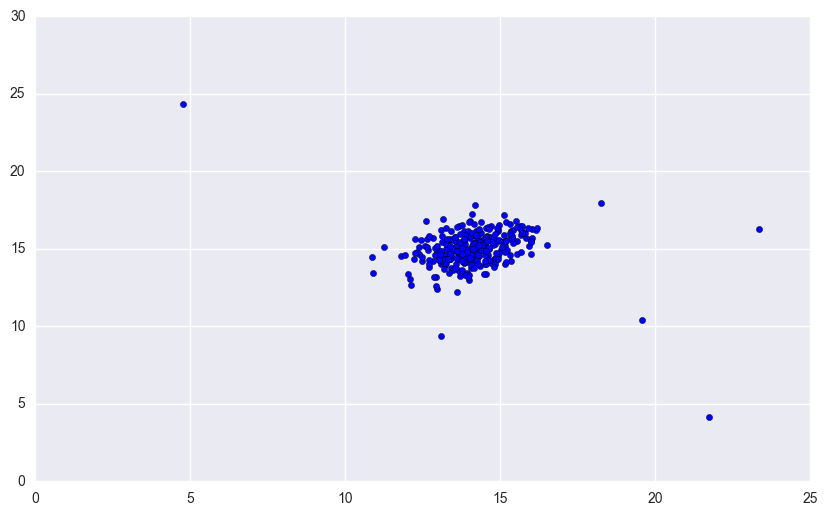

In [25]:
fig, ax = plt.subplots(figsize=(10,6))  
ax.scatter(X[:,0], X[:,1])

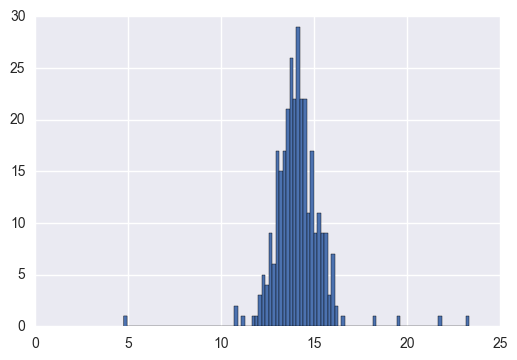

In [33]:
plt.hist(X[:,0], 100)
plt.show()

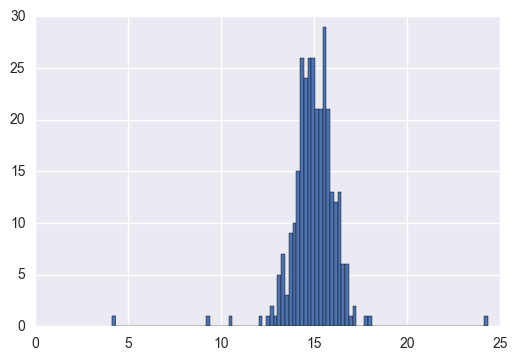

In [34]:
plt.hist(X[:,1], 100)
plt.show()

In [44]:
Xval = data['Xval']  
yval = data['yval']

Xval.shape, yval.shape

((307L, 2L), (307L, 1L))

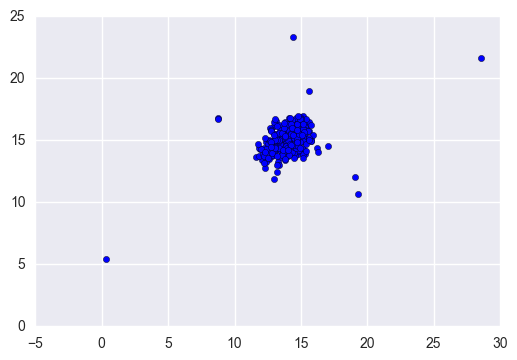

In [45]:
plt.scatter(Xval[:,0], Xval[:,1])

In [46]:
def estimate_gaussian(X):  
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)

    return mu, sigma

mu, sigma = estimate_gaussian(X)  
mu, sigma

(array([ 14.11222578,  14.99771051]), array([ 1.83263141,  1.70974533]))

In [47]:
from scipy import stats  
dist = stats.norm(mu[0], sigma[0])  
dist.pdf(X[:,0])[0:50]

array([ 0.183842  ,  0.20221694,  0.21746136,  0.19778763,  0.20858956,
        0.21652359,  0.16991291,  0.15123542,  0.1163989 ,  0.1594734 ,
        0.21716057,  0.21760472,  0.20141857,  0.20157497,  0.21711385,
        0.21758775,  0.21695576,  0.2138258 ,  0.21057069,  0.1173018 ,
        0.20765108,  0.21717452,  0.19510663,  0.21702152,  0.17429399,
        0.15413455,  0.21000109,  0.20223586,  0.21031898,  0.21313426,
        0.16158946,  0.2170794 ,  0.17825767,  0.17414633,  0.1264951 ,
        0.19723662,  0.14538809,  0.21766361,  0.21191386,  0.21729442,
        0.21238912,  0.18799417,  0.21259798,  0.21752767,  0.20616968,
        0.21520366,  0.1280081 ,  0.21768113,  0.21539967,  0.16913173])

In [48]:
p = np.zeros((X.shape[0], X.shape[1]))  
p[:,0] = stats.norm(mu[0], sigma[0]).pdf(X[:,0])  
p[:,1] = stats.norm(mu[1], sigma[1]).pdf(X[:,1])

p.shape  

(307L, 2L)

In [49]:
pval = np.zeros((Xval.shape[0], Xval.shape[1]))  
pval[:,0] = stats.norm(mu[0], sigma[0]).pdf(Xval[:,0])  
pval[:,1] = stats.norm(mu[1], sigma[1]).pdf(Xval[:,1])

pval.shape

(307L, 2L)

In [52]:
def select_threshold(pval, yval):  
    best_epsilon = 0
    best_f1 = 0
    f1 = 0

    step = (pval.max() - pval.min()) / 1000

    for epsilon in np.arange(pval.min(), pval.max(), step):
        preds = pval < epsilon

        tp = np.sum(np.logical_and(preds == 1, yval == 1)).astype(float)
        fp = np.sum(np.logical_and(preds == 1, yval == 0)).astype(float)
        fn = np.sum(np.logical_and(preds == 0, yval == 1)).astype(float)

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1 = (2 * precision * recall) / (precision + recall)

        if f1 > best_f1:
            best_f1 = f1
            best_epsilon = epsilon

    return best_epsilon, best_f1

epsilon, f1 = select_threshold(pval, yval)  
epsilon, f1

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in double_scalars


(0.0095667060059568421, 0.7142857142857143)

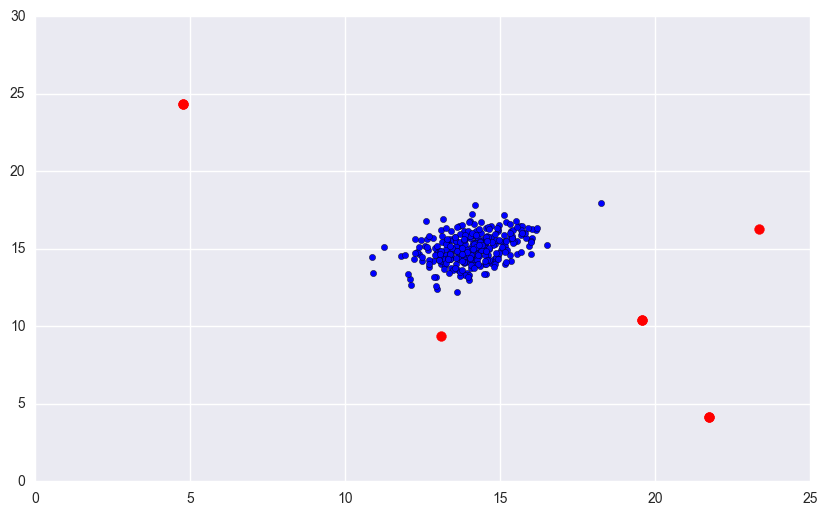

In [53]:
# indexes of the values considered to be outliers
outliers = np.where(p < epsilon)

fig, ax = plt.subplots(figsize=(10,6))  
ax.scatter(X[:,0], X[:,1])  
ax.scatter(X[outliers[0],0], X[outliers[0],1], s=50, color='r', marker='o')  